In [1]:
import scipy
import sys
sys.path.append('./src/')
import pycvxcluster.pycvxcluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

Computing weights...
Weights computed in 0.02533383300760761 seconds.
Starting SSNAL...
SSNAL terminated in 0.2910080829751678 seconds.
Status: converged, Iterations: 14
Clustering completed in 0.3163419159827754 seconds.
Computing weights...
Weights computed in 0.025726999971084297 seconds.
Starting SSNAL...
SSNAL terminated in 0.36477075004950166 seconds.
Status: converged, Iterations: 21
Clustering completed in 0.39049775002058595 seconds.
Computing weights...
Weights computed in 0.023893084027804434 seconds.
Starting SSNAL...
SSNAL terminated in 0.22860816697357222 seconds.
Status: converged, Iterations: 10
Clustering completed in 0.25250125100137666 seconds.
Computing weights...
Weights computed in 0.023134667018894106 seconds.
Starting SSNAL...
SSNAL terminated in 0.38120008300757036 seconds.
Status: converged, Iterations: 16
Clustering completed in 0.40433475002646446 seconds.
Computing weights...
Weights computed in 0.02312083396827802 seconds.
Starting SSNAL...
SSNAL terminate

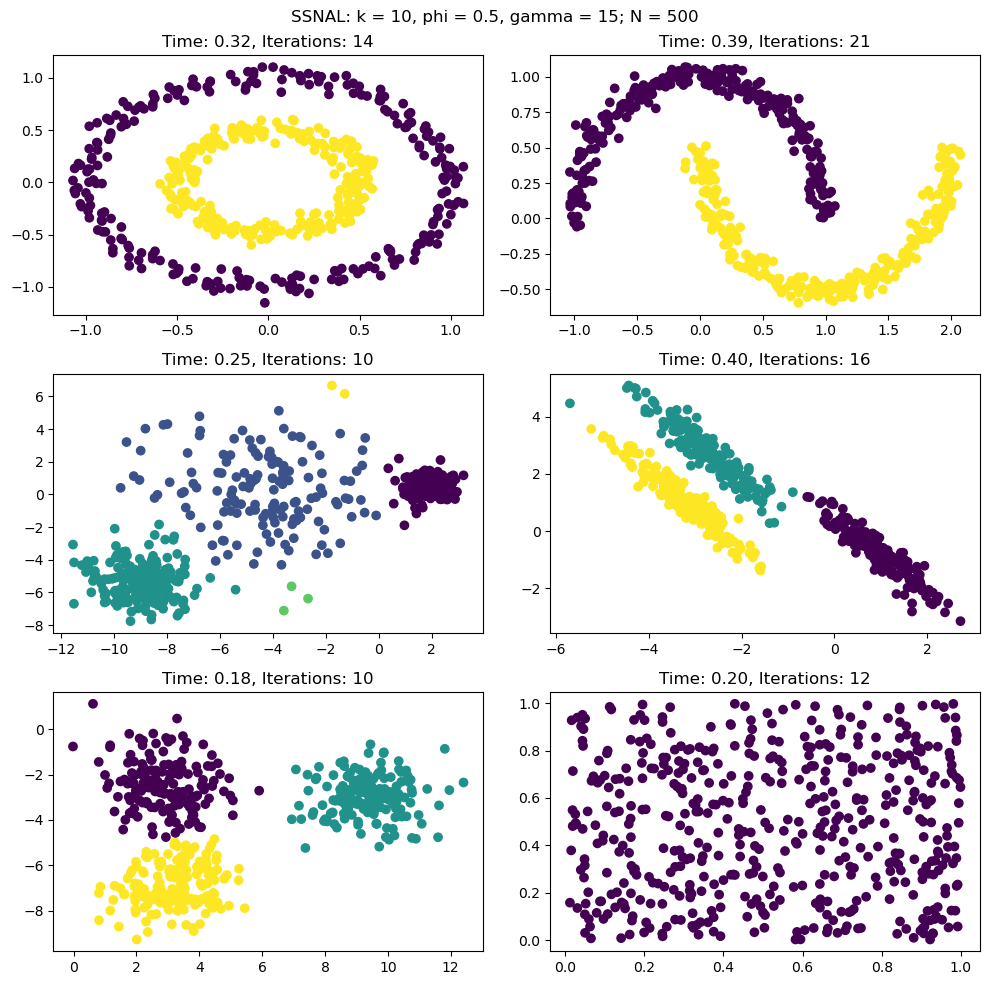

In [13]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = 15)
times = np.zeros(len(datasets))
iterations = np.zeros(len(datasets))
#create empty 3 x 2 figure array
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, data in enumerate(datasets):
    ssnal.fit(data[0])
    times[i] = ssnal.tot_time_
    iterations[i] = ssnal.iter_
    axes[i // 2, i % 2].scatter(data[0][:, 0], data[0][:, 1], c=ssnal.labels_)
    #add time and num iterations to plot
    axes[i // 2, i % 2].set_title(f"Time: {times[i]:.2f}, Iterations: {iterations[i]:.0f}")
#add parameters to title
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}; N = {n_samples}")
plt.tight_layout()
plt.show()
